In [9]:
#Importing Libraries & Data Load

#pip install pandas numpy matplotlib seaborn scikit-learn joblib #if below libraries show error while running make sure to run this code on anaconda command prompt (remove #).

#libraries are premade packages of code which python provides that you can call and use in certain use cases. So, below are few libraries that we are using to run our data processing steps and for creating a model. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Define the path to the Excel file
file_path = r"C:\Users\jonna\OneDrive\Desktop\Churnpredictionproject_new\Data-Resources\Data & Resources\Data\Prediction_Data.xlsx"

 

# Define the sheet name to read data from
sheet_name = 'vw_ChurnData' # vw_ChurnData -coz we will be training and testing model based on this data first.

 

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

 

# Display the first few rows of the fetched data
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

In [10]:
#Data Preprocessing

# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1) #from our data dataframe that we have created in the before step we are droping few columns coz we don't want to use that in our prediction. (customer_id-coz i don't want any bias in the prediction model & I don't want my model to consider this column as predictor variable & I have removed other 2 churn category and reason coz theya re directly related to target variable i.e customer status.)


# List of columns to be label encoded
columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

#we are converting the above categorical columns into numerical columns using label_encoders function below
#we are using label_encoders func coz it will encodes the values of each item in a column in alphabetical order example for gender female comes first so it will assign '0' and male it assigns '1'.
#I have not included customer status in this coz as per alphabetical order it will assign 0 to churned and 1 to not churned but we want vise versa that is why we have encoded this column manually below.
# Encode categorical variables except the target variable
label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])



# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features(independent variable) and target(dependent variable)
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

#generally when we are training ML model we train on 80% of data and test on remaining 20%(test_size) data as shown below 
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_status=42 it is very imp coz it is control measure to keep a check on the randomness of the model training process  make sure to keep same number so that we can reproduce our output infact we can keep any number but always same 

In [11]:
#Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100- it the parameter that decides how many decision tree inside randomforstclassifier model should prepare

# Train the model
rf_model.fit(X_train, y_train) #rf_model.fit-function to train model


RandomForestClassifier(random_state=42)

Confusion Matrix:
[[783  64]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



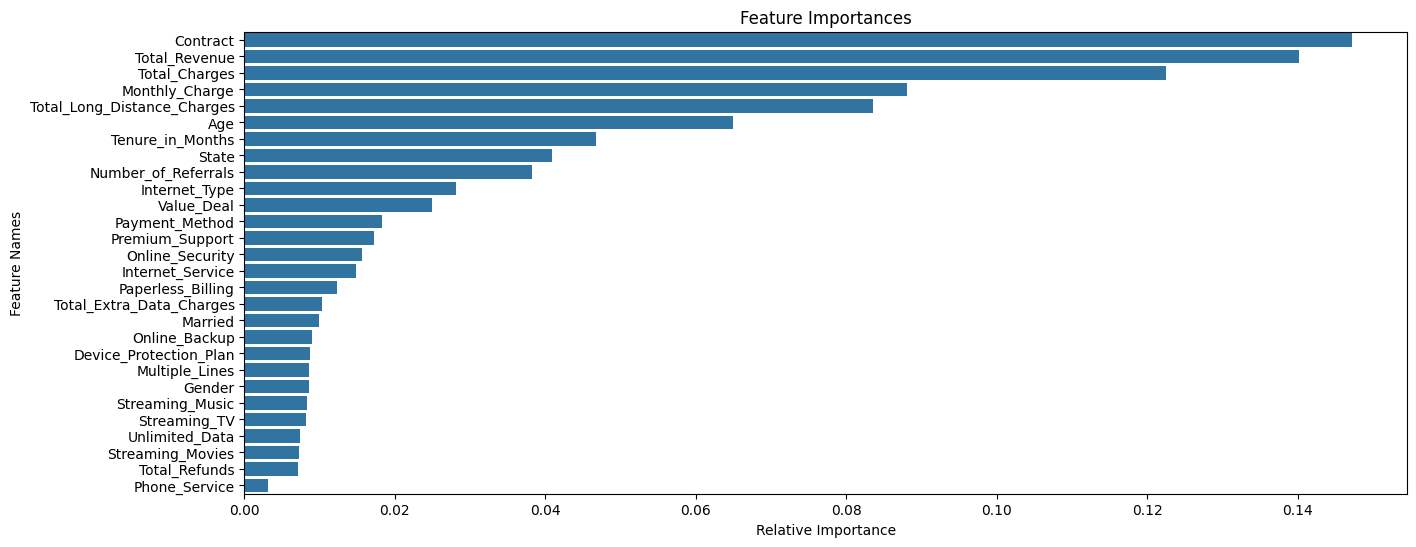

In [12]:
#Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test) #making prediction on test dataset and the output is stored in y_pred.

# Evaluate the model
print("Confusion Matrix:") #confusion matrix is a performance measurement tool used in ml to evaluate the accuracy of a classification model. It is a table that compare the predicted class lables by the model to the actual class lables in the test data.
#each row of the matrix represents the actual class lables and each column represents predicted class labels
#[[TN-correctly predicted class 0 'n' no. of times   FP-'n' it predicted incorrectly for class 1]
#[FN- It incorrectly predicted class 0 'n' no. of times as shown in o/p   TP- it correctly predicted class 1 'n' no. of times which is churned]]

print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#class 0- stayed, class 1-churned.
#precision=tp/[tp+fp] it measure the accuracy of +ve predictions made by model.
#Recall=tp/[tp+fn] it measure the model's ability to correctly identify all +ve instances.
#f1-score is the harmonic mean of precision and recall providing balance btw the 2
#support is the no. of instances we had in our data to make this prediction

# Feature Selection using Feature Importance #this step is optional but we have used to check how much importance does all the features(columns) have which we included in our model and we are storing the imp then sorting it from heightest to lowest and plotting all the imp into chart as shown below.
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [13]:
# from above we understood that our model is performing at 84% accuracy the precision, recall & f1-score for class 0 are higher than class 1 indicating that our model is better at predicting customer who will stay can be due to imbalance in support values i.e class 0 has 847, class 1 has 355 cases only if we can balance the dataset then our model accuracy can be improved for churned as well. 
# feature importance- at times when we are creating a model the model may overfit which that it has learned the test dataset so well that it is predicting at a very high % level but when you give new dataset everything falls apart. So, when that happens it is imp to fine tune our model 
#1 way of fine tuning is by removing all feature which have imp leass than 0.01 or which you think are not imp. This can be done by including that particular column in 1st code part of data preprocessing step i.e droping.


#Use Model for Prediction on New Data
# Define the path to the Joiner Data Excel file
file_path = r"C:\Users\jonna\OneDrive\Desktop\Churnpredictionproject_new\Data-Resources\Data & Resources\Data\Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_JoinData'
 
# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy() #we are preserving our columns before it gets encoded that is coz ones the model predicts and is ready to extract the output, I want the original column name instead of numerical values that are 1's and 0's. 

# Retain the Customer_ID column coz we are droping this column in below code. So, if in the final predicted o/p if we don't have this column once we try to visualize the data in power BI it will be hard for us to map our data with existing data that we have. 
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])


# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"C:\Users\jonna\OneDrive\Desktop\Churnpredictionproject_new\Data-Resources\Data & Resources\Data\Predictions.csv", index=False)

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4

In [ ]:
#note: In total it has predicted that 378 customers who were in joined data list will get churned eventually & this number is very high. So, we might need further model tuning to improve model performance